### Polynomial Chaos Expansion example: Sinusoidal Function  (1 random input, scalar output)

Authors: Katiana Kontolati, Dimitrios Loukrezis \
Date: May 6, 2021

In this example, PCE is used to generate a surrogate model of a sinusoidal function with a single random input and a scalar output.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from UQpy.distributions import Uniform
from UQpy.surrogates import *


Define the sinusoidal function to be approximated.

In [2]:
def sinusoidal_function(x):                                
    return x*np.sin(x)/10.0

Create a distribution object, generate samples and evaluate the function at the samples.

In [3]:
np.random.seed(1)

dist = Uniform(loc=0, scale=10)   
n_samples = 200         
x = dist.rvs(n_samples)  
y = sinusoidal_function(x)  

Create an object from the PCE class, construct a total-degree polynomial basis given a maximum polynomial degree, and compute the PCE coefficients using least squares regression.

In [4]:
max_degree = 15
polynomial_basis = PolynomialBasis.create_total_degree_basis(dist, max_degree)
least_squares = LeastSquareRegression()
pce_lstsq = PolynomialChaosExpansion(polynomial_basis=polynomial_basis, regression_method=least_squares)

pce_lstsq.fit(x,y)


Create an object from the PCE class, construct a total-degree polynomial basis given a maximum polynomial degree, and compute the PCE coefficients using LASSO regression.

In [5]:
polynomial_basis = PolynomialBasis.create_total_degree_basis(dist, max_degree)
lasso = LassoRegression()
pce_lasso = PolynomialChaosExpansion(polynomial_basis=polynomial_basis, regression_method=lasso)

pce_lasso.fit(x,y)

Create an object from the PCE class, construct a total-degree polynomial basis given a maximum polynomial degree, and compute the PCE coefficients using ridge regression.

In [6]:
polynomial_basis = PolynomialBasis.create_total_degree_basis(dist, max_degree)
ridge = RidgeRegression()
pce_ridge = PolynomialChaosExpansion(polynomial_basis=polynomial_basis, regression_method=ridge)

pce_ridge.fit(x,y)

PCE surrogate is used to predict the behavior of the function at new samples.

In [7]:
x_test = dist.rvs(100)
x_test.sort(axis=0) 

y_test_lstsq = pce_lstsq.predict(x_test)
y_test_lasso = pce_lasso.predict(x_test)
y_test_ridge = pce_ridge.predict(x_test)

Plot training data, true function and PCE surrogate

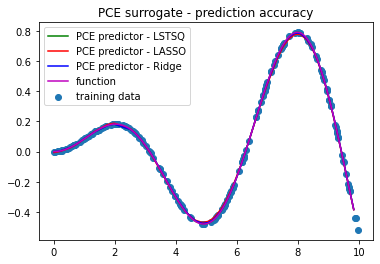

In [8]:
n_samples_ = 1000
x_ = np.linspace(min(x_test), max(x_test), n_samples_)
f = sinusoidal_function(x_)

plt.figure()
plt.plot(x_test, y_test_lstsq, 'g', label='PCE predictor - LSTSQ')
plt.plot(x_test, y_test_lasso, 'r', label='PCE predictor - LASSO')
plt.plot(x_test, y_test_ridge, 'b', label='PCE predictor - Ridge')
plt.scatter(x, y, label='training data')
plt.plot(x_, f, 'm', label='function')
plt.title('PCE surrogate - prediction accuracy')
plt.legend(); plt.show()

### Error Estimation

Construct a validation dataset and get the validation error.

In [9]:
# validation sample
n_samples = 100000
x_val = dist.rvs(n_samples)
y_val = sinusoidal_function(x_val).flatten()

# PCE predictions
y_pce_lstsq = pce_lstsq.predict(x_val).flatten()
y_pce_lasso = pce_lasso.predict(x_val).flatten()
y_pce_ridge = pce_ridge.predict(x_val).flatten()

# mean absolute errors
error_lstsq = np.sum(np.abs(y_val - y_pce_lstsq))/n_samples
error_lasso = np.sum(np.abs(y_val - y_pce_lasso))/n_samples
error_ridge = np.sum(np.abs(y_val - y_pce_ridge))/n_samples

print('Mean absolute error from least squares regression is: ', error_lstsq)
print('Mean absolute error from LASSO regression is: ', error_lasso)
print('Mean absolute error from ridge regression is: ', error_ridge)
print(' ')

# mean relative errors
error_lstsq = np.sum( np.abs((y_val - y_pce_lstsq)/y_val) )/n_samples
error_lasso = np.sum( np.abs((y_val - y_pce_lasso)/y_val) )/n_samples
error_ridge = np.sum( np.abs((y_val - y_pce_ridge)/y_val) )/n_samples

print('Mean relative error from least squares regression is: ', error_lstsq)
print('Mean relative error from LASSO regression is: ', error_lasso)
print('Mean relative error from ridge regression is: ', error_ridge)


Mean absolute error from least squares regression is:  7.86513321418203e-08
Mean absolute error from LASSO regression is:  0.006393070461973453
Mean absolute error from ridge regression is:  0.0017239135197681722
 
Mean relative error from least squares regression is:  0.0039551511523329315
Mean relative error from LASSO regression is:  191.8467566234364
Mean relative error from ridge regression is:  0.6837399971829301


### Moment Estimation

Returns mean and variance of the PCE surrogate.

In [10]:
n_mc = 1000000
x_mc = dist.rvs(n_mc)  
y_mc = sinusoidal_function(x_mc)  
mean_mc = np.mean(y_mc)
var_mc = np.var(y_mc)

print('Moments from least squares regression :', pce_lstsq.get_moments())
print('Moments from LASSO regression :', pce_lasso.get_moments())
print('Moments from Ridge regression :', pce_ridge.get_moments())
print('Moments from Monte Carlo integration: ', mean_mc, var_mc)

Moments from least squares regression : (0.0785, 0.1368)
Moments from LASSO regression : (0.0773, 0.1324)
Moments from Ridge regression : (0.0785, 0.135)
Moments from Monte Carlo integration:  0.07881393454117 0.13692766982783508
